#  TSF GRIP INTERNSHIP SEPT' 20 BATCH
# DATA SCIENCE TASK 2:-
**To Explore supervised machine learning**

In the given regression task, we will predict the percentage of
marks that a student is expected to score based upon the
number of hours he/she studied. This will be a simple linear
regression task as it involves just two variables.

# First of all, we will import the required python packages:-

In [6]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**importing .xlsx File:-**

In [8]:
df=pd.read_excel (r'C:\Users\hp\Desktop\TSF dataset task1.xlsx')
print(df)

    Hours  scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [15]:
print(df.head(5))

   Hours  scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Now, we Find out Statistical Details of our dataset (df) using describe function**

In [18]:
df.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


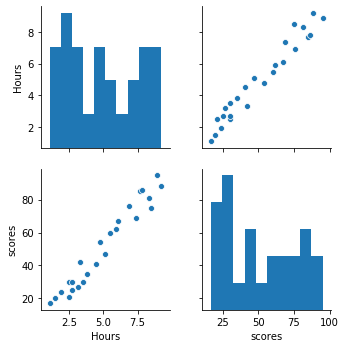

In [75]:
sns.pairplot(df)

**Data Visualization from above analysis:-**

In [23]:
from scipy import stats

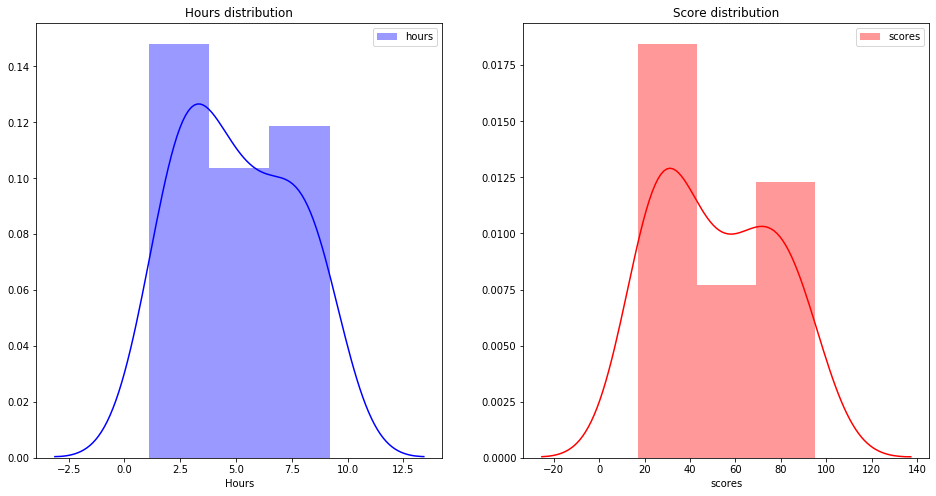

In [28]:
graph=plt.figure(figsize=(16,8))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours distribution')
g2.set_title('Score distribution')
p1=sns.distplot(df['Hours'],label='hours', ax=g1, color='blue')
p2=sns.distplot(df['scores'],label='scores', ax=g2, color='red')
p1.legend()
p2.legend()

In [52]:
# Plotting the distribution of scores
df.plot(x='Hours', y='scores', style='o', figsize=(12,8))  
plt.title('Hours vs scores')  
plt.xlabel('study hours')  
plt.ylabel('Score in percentage')  
plt.grid()
plt.show()

In [50]:
#bar plot representation of given data
plt.figure(figsize=(10,8))
sns.barplot(x=df['Hours'],y=df['scores'])
plt.grid()
plt.show()

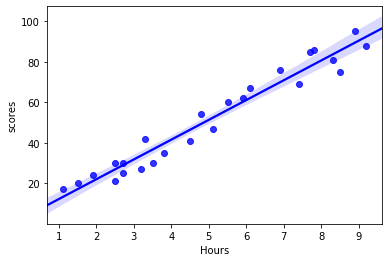

In [9]:
sns.regplot(x=df['Hours'],y=df['scores'], color='blue')

**separating dependent variables from independent variable:**

In [10]:
x=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [15]:
#preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
#Training Machine learning model:-
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
print('training complete')


training complete


In [20]:
#making predictions using linear regression model:-
predictions1=model.predict(X_test)
predictions1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Testing model accuracy:-**

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE1=mean_absolute_error(predictions1, Y_test)
RMSE1=np.sqrt(mean_squared_error(Y_test, predictions1))
print('absolute mean error in linear regression model:', MAE1.round(2))
print('root mean squared error in linear regression model:', RMSE1.round(2))

absolute mean error in linear regression model: 4.18
root mean squared error in linear regression model: 4.65


# Predicted vs Actual value

In [31]:
data1 = pd.DataFrame({'Actual' : Y_test , 'Predicted' : predictions1})
data1.reset_index(drop=True,inplace=True)
data1['Predicted']=predictions1
data1['Deviation']=abs(data1['Actual']-data1['Predicted'])
data1

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

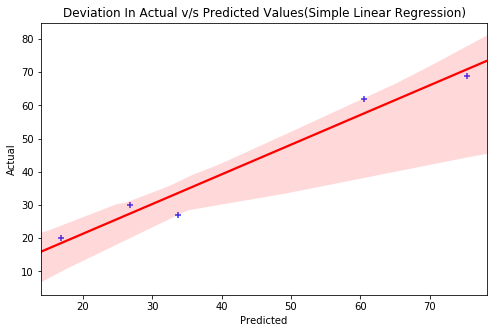

In [71]:
#Visualizing the deviation of data between the actual and predicted value woth the help of Linear Regression Model

plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=data1,line_kws={'color':'red'},scatter_kws={'color':'blue'},marker='+')
plt.title('Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

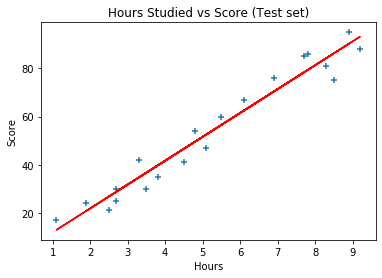

In [72]:
# plotting of training set

plt.scatter(X_train, Y_train, marker = '+')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Hours Studied vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

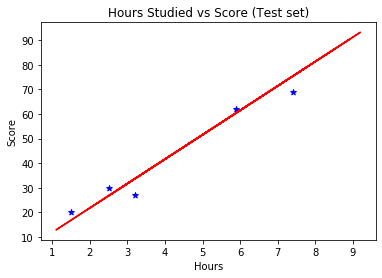

In [62]:
# plot the actual data points of test set
plt.scatter(X_test, Y_test, marker = '*', color = 'blue')
# plot the regression line (same as above)
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Hours Studied vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [58]:
n=float(input())
result=model.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [93.69]


# result:-
**In this simple linear regression task,the predicted percentage that a student is expected to score based upon the number of hours he/she studied. This was a simple linear regression task as it involves just two variables. Conclusion: We conclude that if a student studies for 9.25 hours a day the his predicted scores will be 93.69%**